<a href="https://colab.research.google.com/github/BuzzzyNYC/Data-Manipulation-in-Pandas/blob/main/Data_Manipulation_with_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
files.upload()

In [ ]:
# We will mainly use pandas and numpy
import pandas as pd
import numpy as np

# Inspecting a DataFrame

* `.head()` returns the first few rows (the “head” of the DataFrame).
* `.info()` shows information on each of the columns, such as the data type and number of missing values.
* `.shape` returns the number of rows and columns of the DataFrame.
* `.describe()` calculates a few summary statistics for each column.



In [ ]:
import pandas as pd
# Load data
homelessness = pd.read_csv('homelessness.csv', index_col=0)
# Specify the index_col = 0, so that the first column is used as row labels.

In [ ]:
# Get the first 5 rows of data
homelessness.head()

,region,state,individuals,family_members,state_pop
0,East South Central,Alabama,2570.0,864.0,4887681
1,Pacific,Alaska,1434.0,582.0,735139
2,Mountain,Arizona,7259.0,2606.0,7158024
3,West South Central,Arkansas,2280.0,432.0,3009733
4,Pacific,California,109008.0,20964.0,39461588


In [ ]:
# Get info
homelessness.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   region          51 non-null     object 
 1   state           51 non-null     object 
 2   individuals     51 non-null     float64
 3   family_members  51 non-null     float64
 4   state_pop       51 non-null     int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 2.4+ KB


In [ ]:
# Get shape
homelessness.shape

(51, 5)

In [ ]:
# Data description
homelessness.describe()

,individuals,family_members,state_pop
count,51.000000,51.000000,5.100000e+01
mean,7225.784314,3504.882353,6.405637e+06
std,15991.025083,7805.411811,7.327258e+06
min,434.000000,75.000000,5.776010e+05
25%,1446.500000,592.000000,1.777414e+06
50%,3082.000000,1482.000000,4.461153e+06
75%,6781.500000,3196.000000,7.340946e+06
max,109008.000000,52070.000000,3.946159e+07


# Parts of a DataFrame

A FataFrame is consist of three components, stored as attributes:

* `.values`: A two-dimensional NumPy array of values.
* `.columns`: An index of columns: the column names.
* `.index`: An index for the rows: either row numbers or row names.

In [ ]:
# Import pandas using the alias pd
# import pandas as pd

# Print a 2D NumPy array of the values in homelessness
print(homelessness.values)

# Print the column name/column index of homelessness
print(homelessness.columns)

# Print the row index of homelessness
print(homelessness.index)

# Sorting and Subsetting

## Sorting rows

In cases where rows have the same value (this is common if you sort on a categorical variable), you may wish to break the ties by sorting on another column. You can sort on multiple columns in this way by passing a list of column names.
```
one column	      df.sort_values("breed")
multiple columns	df.sort_values(["breed", "weight_kg"])
```
By combining `.sort_values()` with `.head()`, you can answer questions in the form, "What are the top cases where…?".

1. Sort homelessness by the number of homeless individuals, from smallest to largest, and save this as `homelessness_ind`.
Print the head of the sorted DataFrame.

In [ ]:
# Sort homelessness by individual
homelessness_ind = homelessness.sort_values('individuals')

# Print the top few rows
print(homelessness_ind.head())

                region         state  individuals  family_members  state_pop
50            Mountain       Wyoming        434.0           205.0     577601
34  West North Central  North Dakota        467.0            75.0     758080
7       South Atlantic      Delaware        708.0           374.0     965479
39         New England  Rhode Island        747.0           354.0    1058287
45         New England       Vermont        780.0           511.0     624358


2. Sort homelessness by the number of homeless `family_members` in `descending order`, and save this as `homelessness_fam`.
Print the head of the sorted DataFrame.

In [ ]:
# Sort homelessness by the family members
homelessness_fam = homelessness.sort_values('family_members', ascending = False)

# Print the top few rows
print(homelessness_fam.head())

                region          state  individuals  family_members  state_pop
32        Mid-Atlantic       New York      39827.0         52070.0   19530351
4              Pacific     California     109008.0         20964.0   39461588
21         New England  Massachusetts       6811.0         13257.0    6882635
9       South Atlantic        Florida      21443.0          9587.0   21244317
43  West South Central          Texas      19199.0          6111.0   28628666


3. Sort homelessness first by `region (ascending)`, and then by `number of family members (descending)`. Save this as `homelessness_reg_fam`.
Print the head of the sorted DataFrame.

In [ ]:
# Sort homelessness by region, then descending family members
homelessness_reg_fam = homelessness.sort_values(['region', 'family_members'], ascending=[True, False])

# Print the top few rows
print(homelessness_reg_fam.head())

                region      state  individuals  family_members  state_pop
13  East North Central   Illinois       6752.0          3891.0   12723071
35  East North Central       Ohio       6929.0          3320.0   11676341
22  East North Central   Michigan       5209.0          3142.0    9984072
49  East North Central  Wisconsin       2740.0          2167.0    5807406
14  East North Central    Indiana       3776.0          1482.0    6695497


## Subsetting columns
When working with data, you may not need all of the variables in your dataset. Square brackets `([])` can be used to select only the columns that matter to you in an order that makes sense to you. To select only `"col_a"` of the DataFrame df, use
```
df["col_a"]
```

To select `"col_a"` and `"col_b"` of `df`, use
```
df[["col_a", "col_b"]]
```

1. Create a DataFrame called `individuals` that contains only the individuals column of `homelessness`.
Print the head of the result.

In [ ]:
# Select the individuals column
individuals = homelessness['individuals']

# Print the head of the result
print(individuals.head())

0      2570.0
1      1434.0
2      7259.0
3      2280.0
4    109008.0
Name: individuals, dtype: float64


2. Create a DataFrame called `state_fam` that contains only the `state` and `family_members` columns of `homelessness`, in that order.
Print the head of the result.

In [ ]:
# Select the state and family_members columns
state_fam = homelessness[['state', 'family_members']]

# Print the head of the result
print(state_fam.head())

        state  family_members
0     Alabama           864.0
1      Alaska           582.0
2     Arizona          2606.0
3    Arkansas           432.0
4  California         20964.0


3. Create a DataFrame called `ind_state` that contains the individuals and state columns of homelessness, in that order.
Print the head of the result.

In [ ]:
# Select only the individuals and state columns, in that order
ind_state = homelessness[['individuals', 'state']]

# Print the head of the result
print(ind_state.head())

   individuals       state
0       2570.0     Alabama
1       1434.0      Alaska
2       7259.0     Arizona
3       2280.0    Arkansas
4     109008.0  California


## Subsetting rows
A large part of data science is about `finding which bits of your dataset are interesting.` One of the simplest techniques for this is to find a `subset of rows` that `match some criteria`. This is sometimes known as `filtering rows` or `selecting rows`.

There are many ways to subset a DataFrame, perhaps the most common is to use relational operators to return True or False for each row, then pass that inside square brackets.
```
dogs[dogs["height_cm"] > 60]
dogs[dogs["color"] == "tan"]
```
You can filter for multiple conditions at once by using the `"bitwise and"` operator, `&`.
```
dogs[(dogs["height_cm"] > 60) & (dogs["color"] == "tan")]
```

1. Filter homelessness for cases where the number of `individuals` is `greater than ten thousand`, assigning to `ind_gt_10k`. View the printed result.

In [ ]:
# Filter for rows where individuals is greater than 10000
ind_gt_10k = homelessness[homelessness['individuals'] > 10000]

# Print the result
print(ind_gt_10k)

                region       state  individuals  family_members  state_pop
4              Pacific  California     109008.0         20964.0   39461588
9       South Atlantic     Florida      21443.0          9587.0   21244317
32        Mid-Atlantic    New York      39827.0         52070.0   19530351
37             Pacific      Oregon      11139.0          3337.0    4181886
43  West South Central       Texas      19199.0          6111.0   28628666
47             Pacific  Washington      16424.0          5880.0    7523869


2. Filter homelessness for cases where the USA Census region is "Mountain", assigning to `mountain_reg`. View the printed result.

In [ ]:
# Filter for rows where region is Mountain
mountain_reg = homelessness[homelessness['region']=='Mountain']

# See the result
print(mountain_reg)

      region       state  individuals  family_members  state_pop
2   Mountain     Arizona       7259.0          2606.0    7158024
5   Mountain    Colorado       7607.0          3250.0    5691287
12  Mountain       Idaho       1297.0           715.0    1750536
26  Mountain     Montana        983.0           422.0    1060665
28  Mountain      Nevada       7058.0           486.0    3027341
31  Mountain  New Mexico       1949.0           602.0    2092741
44  Mountain        Utah       1904.0           972.0    3153550
50  Mountain     Wyoming        434.0           205.0     577601


3. Filter homelessness for cases where the number of `family_members` is `less than one thousand` and the `region` is `"Pacific"`, assigning to `fam_lt_1k_pac`. View the printed result.

In [ ]:
# Filter for rows where family_members is less than 1000 and region is Pacific
fam_lt_1k_pac = homelessness[(homelessness['family_members'] < 1000) & (homelessness['region'] == 'Pacific')]

# See the result
print(fam_lt_1k_pac)

    region   state  individuals  family_members  state_pop
1  Pacific  Alaska       1434.0           582.0     735139


## Subsetting rows by categorical variables
Subsetting data based on a categorical variable often involves using the `"or"` operator `(|)` to select rows from multiple categories. 
```
df[(df["col"] == "value_1") | (df["col"] == "value_2")]
```
This can get tedious when you want all states in one of three different regions, for example. Instead, use the `.isin()` method, which will allow you to tackle this problem by writing one condition instead of three separate ones.
```
colors = ["brown", "black", "tan"]
condition = dogs["color"].isin(colors)
dogs[condition]
```

```
df[df["col"].isin(["value_1", "value_2"])]
```

1. Filter homelessness for cases where the USA census region is `"South Atlantic"` or it is `"Mid-Atlantic"`, assigning to `south_mid_atlantic`. View the printed result.

In [ ]:
# Subset for rows in South Atlantic or Mid-Atlantic regions
south_mid_atlantic = homelessness[(homelessness['region'] == 'South Atlantic') | (homelessness['region'] == 'Mid-Atlantic')]

# See the result
print(south_mid_atlantic)

            region                 state  ...  family_members  state_pop
7   South Atlantic              Delaware  ...           374.0     965479
8   South Atlantic  District of Columbia  ...          3134.0     701547
9   South Atlantic               Florida  ...          9587.0   21244317
10  South Atlantic               Georgia  ...          2556.0   10511131
20  South Atlantic              Maryland  ...          2230.0    6035802
30    Mid-Atlantic            New Jersey  ...          3350.0    8886025
32    Mid-Atlantic              New York  ...         52070.0   19530351
33  South Atlantic        North Carolina  ...          2817.0   10381615
38    Mid-Atlantic          Pennsylvania  ...          5349.0   12800922
40  South Atlantic        South Carolina  ...           851.0    5084156
46  South Atlantic              Virginia  ...          2047.0    8501286
48  South Atlantic         West Virginia  ...           222.0    1804291

[12 rows x 5 columns]


2. Filter homelessness for cases where the USA census `state` is in the list of Mojave states, `canu`, assigning to `mojave_homelessness`. View the printed result.

In [ ]:
# The Mojave Desert states
canu = ["California", "Arizona", "Nevada", "Utah"]

# Filter for rows in the Mojave Desert states
mojave_homelessness = homelessness['state'].isin(canu)

# See the result
print(homelessness[mojave_homelessness])

      region       state  individuals  family_members  state_pop
2   Mountain     Arizona       7259.0          2606.0    7158024
4    Pacific  California     109008.0         20964.0   39461588
28  Mountain      Nevada       7058.0           486.0    3027341
44  Mountain        Utah       1904.0           972.0    3153550


# Adding new columns
You aren't stuck with just the data you are given. Instead, you can add new columns to a DataFrame. This has many names, such as transforming, mutating, and feature engineering.

You can create new columns from scratch, but it is also common to derive them from other columns, for example, by adding columns together or by changing their units.
```
df["new_col"] = df["col_a"] + df["col_b"]
```

1. Add a new column to homelessness, named `total`, containing the `sum of the individuals` and `family_members` columns.
2. Add another column to homelessness, named `p_individuals`, containing the proportion of homeless people in each state who are individuals.

In [ ]:
# Add total col as sum of individuals and family_members
homelessness['total'] = homelessness['individuals'] + homelessness['family_members']

# Add p_individuals col as proportion of individuals
homelessness['p_individuals'] = homelessness['individuals'] / homelessness['total']

# See the result
homelessness.head()

,region,state,individuals,family_members,state_pop,total,p_individuals
0,East South Central,Alabama,2570.0,864.0,4887681,3434.0,0.748398
1,Pacific,Alaska,1434.0,582.0,735139,2016.0,0.711310
2,Mountain,Arizona,7259.0,2606.0,7158024,9865.0,0.735834
3,West South Central,Arkansas,2280.0,432.0,3009733,2712.0,0.840708
4,Pacific,California,109008.0,20964.0,39461588,129972.0,0.838704


# Challenge
You've seen the four most common types of data manipulation: 
* sorting rows, 
* subsetting columns, 
* subsetting rows, and 
* adding new columns. 
In a real-life data analysis, you can mix and match these four manipulations to answer a multitude of questions.

In this exercise, you'll answer the question, `"Which state has the highest number of homeless individuals per 10,000 people in the state?"` Combine your new pandas skills to find out.

Ideas:

Columns we need: state, individuals, state_pop

Create new column: interval of 10000 people

In [ ]:
# Create indiv_per_10k col as homeless individuals per 10k state pop
homelessness['indiv_per_10k'] = 10000 * homelessness['individuals']/homelessness['state_pop']
homelessness.head()

,region,state,individuals,family_members,state_pop,total,p_individuals,indiv_per_10k
0,East South Central,Alabama,2570.0,864.0,4887681,3434.0,0.748398,5.258117
1,Pacific,Alaska,1434.0,582.0,735139,2016.0,0.711310,19.506515
2,Mountain,Arizona,7259.0,2606.0,7158024,9865.0,0.735834,10.141067
3,West South Central,Arkansas,2280.0,432.0,3009733,2712.0,0.840708,7.575423
4,Pacific,California,109008.0,20964.0,39461588,129972.0,0.838704,27.623825


In [ ]:
# Subset rows for indiv_per_10k greater than 20
high_homelessness = homelessness[homelessness['indiv_per_10k'] > 20]
high_homelessness

,region,state,individuals,family_members,state_pop,total,p_individuals,indiv_per_10k
4,Pacific,California,109008.0,20964.0,39461588,129972.0,0.838704,27.623825
8,South Atlantic,District of Columbia,3770.0,3134.0,701547,6904.0,0.546060,53.738381
11,Pacific,Hawaii,4131.0,2399.0,1420593,6530.0,0.632619,29.079406
28,Mountain,Nevada,7058.0,486.0,3027341,7544.0,0.935578,23.314189
32,Mid-Atlantic,New York,39827.0,52070.0,19530351,91897.0,0.433387,20.392363
37,Pacific,Oregon,11139.0,3337.0,4181886,14476.0,0.769481,26.636307
47,Pacific,Washington,16424.0,5880.0,7523869,22304.0,0.736370,21.829195


In [ ]:
# Sort high_homelessness by descending indiv_per_10k
high_homelessness_sort = high_homelessness.sort_values('indiv_per_10k', ascending=False)
high_homelessness_sort.head()

,region,state,individuals,family_members,state_pop,total,p_individuals,indiv_per_10k
8,South Atlantic,District of Columbia,3770.0,3134.0,701547,6904.0,0.546060,53.738381
11,Pacific,Hawaii,4131.0,2399.0,1420593,6530.0,0.632619,29.079406
4,Pacific,California,109008.0,20964.0,39461588,129972.0,0.838704,27.623825
37,Pacific,Oregon,11139.0,3337.0,4181886,14476.0,0.769481,26.636307
28,Mountain,Nevada,7058.0,486.0,3027341,7544.0,0.935578,23.314189


In [ ]:
# From high_homelessness_srt, select the state and indiv_per_10k cols
result = high_homelessness_sort[['state', 'indiv_per_10k']]

In [ ]:
# Print the result
# print(result.iloc[0])
print(result.head(1))

                  state  indiv_per_10k
8  District of Columbia      53.738381


# Aggregating DataFrames

## Summary Statistics

### Mean and median
Summary statistics are exactly what they sound like - they summarize many numbers in one statistic. For example, mean, median, minimum, maximum, and standard deviation are summary statistics. Calculating summary statistics allows you to get a better sense of your data, even if there's a lot of it.

In [ ]:
# load pandas package
import pandas as pd
# Load walmart sales data
sales = pd.read_csv('sales_subset.csv', index_col=0)

In [ ]:
# Print the head of the sales DataFrame
print(sales.head())

# Print the info about the sales DataFrame
print(sales.info())

# Print the mean of weekly_sales
print(sales['weekly_sales'].mean())

# Print the median of weekly_sales
print(sales.weekly_sales.median())

   store type  department  ... temperature_c  fuel_price_usd_per_l  unemployment
0      1    A           1  ...      5.727778              0.679451         8.106
1      1    A           1  ...      8.055556              0.693452         8.106
2      1    A           1  ...     16.816667              0.718284         7.808
3      1    A           1  ...     22.527778              0.748928         7.808
4      1    A           1  ...     27.050000              0.714586         7.808

[5 rows x 9 columns]
<class 'pandas.core.frame.DataFrame'>
Int64Index: 10774 entries, 0 to 10773
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   store                 10774 non-null  int64  
 1   type                  10774 non-null  object 
 2   department            10774 non-null  int64  
 3   date                  10774 non-null  object 
 4   weekly_sales          10774 non-null  float64
 5   is_holiday            

### Summarizing dates
Summary statistics can also be calculated on date columns that have values with the data type `datetime64`. Some summary statistics — like mean — don't make a ton of sense on dates, but others are super helpful, for example, minimum and maximum, which allow you to see what time range your data covers.

In [ ]:
# Print the maximum of the date column
print(sales['date'].max())

# Print the minimum of the date column
print(sales.date.min())

2012-10-26
2010-02-05


### Efficient summaries
While pandas and NumPy have tons of functions, sometimes, you may need a different function to summarize your data.

The `.agg()` method allows you to apply your own custom functions to a DataFrame, as well as apply functions to more than one column of a DataFrame at once, making your aggregations super-efficient. For example,
```
df['column'].agg(function)
```
In the custom function for this exercise, `"IQR"` is short for `inter-quartile range`, which is the `75th percentile minus the 25th percentile`. It's an alternative to standard deviation that is helpful if your data contains outliers.

1. Use the custom `iqr` function defined for you along with `.agg()` to print the IQR of the `temperature_c` column of sales.

In [ ]:
# A custom IQR function
def iqr(column):
    return column.quantile(0.75) - column.quantile(0.25)
    
# Print IQR of the temperature_c column
print(sales['temperature_c'].agg(iqr))

16.583333333333336


2. Update the column selection to use the custom `iqr` function with `.agg()` to print the `IQR` of `temperature_c`, `fuel_price_usd_per_l`, and `unemployment`, in that order.

In [ ]:
sales.columns

Index(['store', 'type', 'department', 'date', 'weekly_sales', 'is_holiday',
       'temperature_c', 'fuel_price_usd_per_l', 'unemployment'],
      dtype='object')

In [ ]:
# Update to print IQR of temperature_c, fuel_price_usd_per_1, & unemployment
print(sales[['temperature_c', 'fuel_price_usd_per_l', 'unemployment']].agg(iqr))

temperature_c           16.583333
fuel_price_usd_per_l     0.073176
unemployment             0.565000
dtype: float64


3. Update the aggregation functions called by `.agg()`: include `iqr` and `np.median` in that order.

In [ ]:
# Import NumPy and create custom IQR function
import numpy as np
def iqr(column):
    return column.quantile(0.75) - column.quantile(0.25)

# Update to print IQR, median, and mean of temperature_c, fuel_price_usd_per_l, & unemployment
print(sales[["temperature_c", "fuel_price_usd_per_l", "unemployment"]].agg([iqr, np.median, np.mean]))

        temperature_c  fuel_price_usd_per_l  unemployment
iqr         16.583333              0.073176      0.565000
median      16.966667              0.743381      8.099000
mean        15.731978              0.749746      8.082009


### Cumulative statistics
Cumulative statistics can also be helpful in tracking summary statistics over time. In this exercise, you'll calculate the `cumulative sum` and `cumulative max` of a department's `weekly sales`, which will allow you to identify what the `total sales` were so far as well as what the `highest weekly sales` were so far.

Create a DataFrame called `sales_1_1`, which contains the sales data for `department 1 of store 1`.

1. Sort the rows of `sales_1_1` by the date column in ascending order.

In [ ]:
# Create sales_1_1 subset to work with
# sales.head()
sales_1_1 = sales[(sales['department'] == 1) & sales['store'] == 1]

sales_1_1.shape

(72, 9)

In [ ]:
sales_1_1.head()

,store,type,department,date,weekly_sales,is_holiday,temperature_c,fuel_price_usd_per_l,unemployment,cum_weekly_sales,cum_max_sales
0,1,A,1,2010-02-05,24924.50,False,5.727778,0.679451,8.106,24924.50,24924.50
8109,27,A,1,2010-02-05,32313.79,False,-2.672222,0.780365,8.237,57238.29,32313.79
4495,13,A,1,2010-02-05,46761.90,False,-0.261111,0.704283,8.316,104000.19,46761.90
6293,19,A,1,2010-02-05,21500.58,False,-6.133333,0.780365,8.350,125500.77,46761.90
9899,39,A,1,2010-02-05,21244.50,False,6.833333,0.679451,8.554,146745.27,46761.90


In [ ]:
# Sort sales_1_1 by date
sales_1_1 = sales_1_1.sort_values("date")

2. Get the `cumulative sum of weekly_sales` and add it as a new column of sales_1_1 called `cum_weekly_sales`.

In [ ]:
# Get the cumulative sum of weekly_sales, add as cum_weekly_sales col
sales_1_1['cum_weekly_sales'] = sales_1_1.weekly_sales.cumsum()

3. Get the `cumulative maximum of weekly_sales`, and add it as a column called `cum_max_sales`.

In [ ]:
sales_1_1['cum_max_sales'] = sales_1_1.weekly_sales.cummax()

4. Print the `date, weekly_sales, cum_weekly_sales, and cum_max_sales` columns.

In [ ]:
print(sales_1_1[['date', 'weekly_sales', 'cum_weekly_sales', 'cum_max_sales']])

            date  weekly_sales  cum_weekly_sales  cum_max_sales
0     2010-02-05      24924.50          24924.50       24924.50
8109  2010-02-05      32313.79          57238.29       32313.79
4495  2010-02-05      46761.90         104000.19       46761.90
6293  2010-02-05      21500.58         125500.77       46761.90
9899  2010-02-05      21244.50         146745.27       46761.90
...          ...           ...               ...            ...
8120  2011-01-07      17654.48        1897628.33      139870.90
4506  2011-01-07      24627.06        1922255.39      139870.90
11    2011-01-07      15984.24        1938239.63      139870.90
9020  2011-01-07      11953.28        1950192.91      139870.90
9910  2011-01-07      11141.04        1961333.95      139870.90

[72 rows x 4 columns]


### Dropping duplicates
Removing duplicates is an essential skill to get accurate counts because often, you don't want to count the same thing multiple times. In this exercise, you'll create some new DataFrames using unique values from sales.

1. Remove rows of `sales` with duplicate pairs of `store` and `type` and save as `store_types` and print the head.

In [ ]:
# Drop duplicate store/type combinations
store_types = sales.drop_duplicates(subset=["store", "type"])
print(store_types.head())

      store type  department  ... temperature_c  fuel_price_usd_per_l  unemployment
0         1    A           1  ...      5.727778              0.679451         8.106
901       2    A           1  ...      4.550000              0.679451         8.324
1798      4    A           1  ...      6.533333              0.686319         8.623
2699      6    A           1  ...      4.683333              0.679451         7.259
3593     10    B           1  ...     12.411111              0.782478         9.765

[5 rows x 9 columns]


2. Remove rows of `sales` with duplicate pairs of `store` and `department` and save as `store_depts` and print the head.

In [ ]:
# Drop duplicate store/department combinations
store_depts = sales.drop_duplicates(subset=["store", "department"])
print(store_depts.head())

    store type  department  ... temperature_c  fuel_price_usd_per_l  unemployment
0       1    A           1  ...      5.727778              0.679451         8.106
12      1    A           2  ...      5.727778              0.679451         8.106
24      1    A           3  ...      5.727778              0.679451         8.106
36      1    A           4  ...      5.727778              0.679451         8.106
48      1    A           5  ...      5.727778              0.679451         8.106

[5 rows x 9 columns]


3. Subset the rows that `are holiday weeks` using the `is_holiday` column, and drop the duplicate dates, saving as `holiday_dates`.

In [ ]:
# Subset the rows where is_holiday is True and drop duplicate dates
holiday_dates = sales[sales["is_holiday"]].drop_duplicates(subset="date")

4. Select the `date` column of `holiday_dates`, and print.

In [ ]:
# Print date col of holiday_dates
print(holiday_dates["date"])

498     2010-09-10
691     2011-11-25
2315    2010-02-12
6735    2012-09-07
6810    2010-12-31
6815    2012-02-10
6820    2011-09-09
Name: date, dtype: object


### Counting categorical variables
Counting is a great way to get an overview of your data and to spot curiosities that you might not notice otherwise. In this exercise, you'll count the number of each type of store and the number of each department number using the DataFrames you created in the previous exercise:
```
# Drop duplicate store/type combinations
store_types = sales.drop_duplicates(subset=["store", "type"])

# Drop duplicate store/department combinations
store_depts = sales.drop_duplicates(subset=["store", "department"])
```


1. Count the `number of stores` of each store type in `store_types.`

In [ ]:
# Count the number of stores of each type
store_counts = store_types["type"].value_counts()
print(store_counts)

A    11
B     1
Name: type, dtype: int64


2. Count the `proportion` of stores of each store type in store_types.

In [ ]:
# Get the proportion of stores of each type
store_props = store_types["type"].value_counts(normalize=True)
print(store_props)

A    0.916667
B    0.083333
Name: type, dtype: float64


3. Count the number of different `departments` in `store_depts`, sorting the counts in descending order.

In [ ]:
# Count the number of each department number and sort
dept_counts_sorted = store_depts["department"].value_counts(sort=True)
print(dept_counts_sorted)

1     12
55    12
72    12
71    12
67    12
      ..
37    10
48     8
50     6
39     4
43     2
Name: department, Length: 80, dtype: int64


4. Count the proportion of different departments in `store_depts`, sorting the proportions in descending order.

In [ ]:
# Get the proportion of departments of each number and sort
dept_props_sorted = store_depts["department"].value_counts(sort=True, normalize=True)
print(dept_props_sorted)

1     0.012917
55    0.012917
72    0.012917
71    0.012917
67    0.012917
        ...   
37    0.010764
48    0.008611
50    0.006459
39    0.004306
43    0.002153
Name: department, Length: 80, dtype: float64


## Grouped Summary Statistics

### What percent of sales occurred at each store type?
While `.groupby()` is useful, you can calculate grouped summary statistics without it.

Walmart distinguishes three types of stores: `"supercenters,"` `"discount stores,"` and `"neighborhood markets,"` encoded in this dataset as type `"A," "B," and "C."` In this exercise, you'll calculate the total sales made at each store type, without using `.groupby().` You can then use these numbers to see what proportion of Walmart's total sales were made at each type.

1. Calculate the total `weekly_sales` over the whole dataset.

In [ ]:
# Calc total weekly sales
sales_all = sales["weekly_sales"].sum()
sales_all

256894718.89999998

2. Subset for type `"A"` stores, and calculate their total weekly sales.

In [ ]:
# Subset for type A stores, calc total weekly sales
sales_A = sales[sales["type"] == "A"]["weekly_sales"].sum()
sales_A

233716315.01

3. Do the same for type `"B"` and type `"C"` stores.

In [ ]:
# Subset for type B stores, calc total weekly sales
sales_B = sales[sales["type"] == "B"]["weekly_sales"].sum()

# Subset for type C stores, calc total weekly sales
sales_C = sales[sales["type"] == "C"]["weekly_sales"].sum()

4. Combine the `A/B/C` results into a list, and `divide by sales_all` to get the proportion of sales by type.

In [ ]:
# Get proportion for each type
sales_prop_by_type = [sales_A, sales_B, sales_C] / sales_all
print(sales_prop_by_type)

[0.9097747 0.0902253 0.       ]


### Calculations with `.groupby()`
The `.groupby()` method makes life much easier. In this exercise, you'll perform the same calculations as last time, except you'll use the `.groupby()` method. You'll also perform calculations on data grouped by two variables to see if sales differ by store type depending on if it's a holiday week or not.


1.
* Group sales `"type"`, take the sum of `"weekly_sales"`, and store as `sales_by_type`.
* Calculate the proportion of sales at each store type by dividing by the `sum of sales_by_type`. Assign to `sales_propn_by_type`.

In [ ]:
# Group by type; calc total weekly sales
sales_by_type = sales.groupby("type")["weekly_sales"].sum()
sales_by_type

type
A    2.337163e+08
B    2.317840e+07
Name: weekly_sales, dtype: float64

In [ ]:
# Get proportion for each type
sales_prop_by_type = sales_by_type/sum(sales_by_type)
sales_prop_by_type

type
A    0.909775
B    0.090225
Name: weekly_sales, dtype: float64

2. Group sales by `"type"` and `"is_holiday"`, take the `sum of weekly_sales`, and store as `sales_by_type_is_holiday`.

In [ ]:
sales_by_type_is_holiday = sales.groupby(["type", "is_holiday"])["weekly_sales"].sum()
sales_by_type_is_holiday

type  is_holiday
A     False         2.336927e+08
      True          2.360181e+04
B     False         2.317678e+07
      True          1.621410e+03
Name: weekly_sales, dtype: float64

### Multiple grouped summaries
Earlier in this chapter, you saw that the `.agg()` method is useful to compute multiple statistics on multiple variables. It also works with grouped data. NumPy, which is imported as np, has many different summary statistics functions, including: `np.min, np.max, np.mean, and np.median.`

In [ ]:
# Import numpy with the alias np
import numpy as np

1. Get the `min, max, mean, and median` of `weekly_sales` for each store type using `.groupby()` and `.agg()`. Store this as `sales_stats`. Make sure to use numpy functions!

In [ ]:
sales_stats = sales.groupby("type")["weekly_sales"].agg([np.min, np.max, np.median])
print(sales_stats)

        amin       amax    median
type                             
A    -1098.0  293966.05  11943.92
B     -798.0  232558.51  13336.08


2. Get the `min, max, mean, and median `of `unemployment` and `fuel_price_usd_per_l` for each store type. Store this as `unemp_fuel_stats`.

In [ ]:
unemp_fuel_stats = sales.groupby("type")[["unemployment", "fuel_price_usd_per_l"]].agg([np.min, np.max, np.median, np.mean])
unemp_fuel_stats

unemployment                ... fuel_price_usd_per_l                    
             amin   amax median  ...                 amax    median      mean
type                             ...                                         
A           3.879  8.992  8.067  ...             1.107410  0.735455  0.744619
B           7.170  9.765  9.199  ...             1.107674  0.803348  0.805858

[2 rows x 8 columns]

## Pivot tables

### Pivoting on one variable
Pivot tables are the standard way of aggregating data in spreadsheets. In pandas, pivot tables are essentially just another way of performing grouped calculations. That is, the `.pivot_table()` method is just an alternative to `.groupby()`.

In this exercise, you'll perform calculations using `.pivot_table()` to replicate the calculations you performed in the last lesson using `.groupby()`.

1. Get the mean `weekly_sales` by `type` using `.pivot_table()` and store as `mean_sales_by_type`.

In [ ]:
# Pivot for mean weekly_sales for each store type
mean_sales_by_type = sales.pivot_table(values="weekly_sales", index="type")
print(mean_sales_by_type)

      weekly_sales
type              
A     23674.667242
B     25696.678370


2. Get the `mean` and `median` (using NumPy functions) of `weekly_sales` by `type` using `.pivot_table()` and store as `mean_med_sales_by_type`.

In [ ]:
import numpy as np
mean_med_sales_by_type = sales.pivot_table(values="weekly_sales", index="type", aggfunc=[np.mean, np.median])

print(mean_med_sales_by_type)

              mean       median
      weekly_sales weekly_sales
type                           
A     23674.667242     11943.92
B     25696.678370     13336.08


3. Get the mean of `weekly_sales` by `type` and `is_holiday` using `.pivot_table()` and store as `mean_sales_by_type_holiday`.

In [ ]:
mean_sales_by_type_holiday = sales.pivot_table(values="weekly_sales", index="type", columns="is_holiday")

print(mean_sales_by_type_holiday)

is_holiday         False       True
type                               
A           23768.583523  590.04525
B           25751.980533  810.70500


### Fill in missing values and sum values with pivot tables
The `.pivot_table()` method has several useful arguments, including `fill_value` and `margins`.

* `fill_value` replaces missing values with a real value (known as imputation). What to replace missing values with is a topic big enough to have its own course (Dealing with Missing Data in Python), but the simplest thing to do is to substitute a dummy value.

* `margins` is a shortcut for when you pivoted by two variables, but also wanted to pivot by each of those variables separately: it gives the row and column totals of the pivot table contents.

1. Print the `mean weekly_sales` by `department` and `type`, filling in any missing values with 0.

In [ ]:
# Print mean weekly_sales by department and type; fill missing values with 0
sales.pivot_table(values="weekly_sales", index="type", columns="department", fill_value=0)

department,1,2,3,4,5,6,7,8,9,10,11,12,13,14,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,54,55,56,58,59,60,67,71,72,74,77,78,79,80,81,82,83,85,87,90,91,92,93,94,95,96,97,98,99
type,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
A,30961.725379,67600.158788,17160.002955,44285.399091,34821.011364,7136.292652,38454.336818,48583.475303,30120.449924,30930.456364,23028.312727,6786.840606,51398.168561,22457.695303,25202.751894,16167.586136,12201.771212,1560.951719,8312.070227,9324.387197,14225.324167,29350.745076,8204.587576,13382.164242,11254.311212,2079.160455,968.247348,6859.108485,5403.619773,3221.001818,9599.303409,8588.995303,19148.733712,3504.714015,2455.818409,3628.019722,84796.323939,5.198571,70695.733636,2218.515909,7831.950530,0.66,5984.462576,19.120877,29991.069924,10.484902,1020.982949,11008.071742,2325.230167,23.057527,2919.754773,221.288030,15368.005985,5529.171136,6510.454621,1358.490530,461.176591,12064.737500,7486.394318,72767.860227,22097.090152,370.651316,8.893878,40643.113106,22425.941667,28417.831061,21698.068561,7020.960985,3593.235379,22549.672045,85776.905909,70423.165227,139722.204773,53413.633939,60081.155303,123933.787121,21367.042857,28471.266970,12875.423182,379.123659
B,44050.626667,112958.526667,30580.655000,51219.654167,63236.875000,10717.297500,52909.653333,90733.753333,66679.301667,48595.126667,35488.429167,9656.520000,67213.587500,40400.020000,29558.182500,27675.351667,17361.347500,3365.895000,16191.810000,10368.968333,26044.797500,63960.273333,15376.829167,20619.285000,17535.457500,4553.720833,1422.762500,14999.843333,12442.080000,6151.995000,21047.399167,14912.160000,44931.189167,7560.045000,3827.720000,4303.381667,85665.308333,0.000000,104830.629167,7514.514167,11280.798333,0.00,9091.141667,41.751667,53406.163333,-71.916667,1965.108333,19313.554167,3991.500000,38.661667,5360.840833,551.016667,20420.726667,992.310000,5156.833333,2536.538333,577.850000,13327.714167,15945.855000,145237.726667,44480.321667,1590.000000,1.714286,39802.038333,116.680000,11084.591667,21943.495833,327.011667,2887.316667,21829.132500,14780.210000,13199.602500,50859.278333,1466.274167,161.445833,77082.102500,9528.538333,5828.873333,217.428333,0.000000


2. Print the `mean weekly_sales` by `department` and `type`, filling in any missing values with 0 and `summing all rows and columns`.

In [ ]:
# Print the mean weekly_sales by department and type; fill missing values with 0s; sum all rows and cols
sales.pivot_table(values="weekly_sales", index="department", columns="type", fill_value=0, margins=True)

type,A,B,All
department,,,
1,30961.725379,44050.626667,32052.467153
2,67600.158788,112958.526667,71380.022778
3,17160.002955,30580.655000,18278.390625
4,44285.399091,51219.654167,44863.253681
5,34821.011364,63236.875000,37189.000000
...,...,...,...
96,21367.042857,9528.538333,20337.607681
97,28471.266970,5828.873333,26584.400833
98,12875.423182,217.428333,11820.590278


# Slicing and Indexing DataFrames 

## Setting and removing indexes
pandas allows you to designate columns as an index. This enables cleaner code when taking subsets (as well as providing more efficient lookup under some circumstances).

In this chapter, you'll be exploring `temperatures`, a DataFrame of average temperatures in cities around the world.

In [ ]:
# Load temperature data
temperatures = pd.read_csv('temperatures.csv', index_col=0)
temperatures.head()

,date,city,country,avg_temp_c
0,2000-01-01,Abidjan,Côte D'Ivoire,27.293
1,2000-02-01,Abidjan,Côte D'Ivoire,27.685
2,2000-03-01,Abidjan,Côte D'Ivoire,29.061
3,2000-04-01,Abidjan,Côte D'Ivoire,28.162
4,2000-05-01,Abidjan,Côte D'Ivoire,27.547


In [ ]:
# Index temperatures by city
temperatures_ind = temperatures.set_index("city")
print(temperatures_ind)

               date        country  avg_temp_c
city                                          
Abidjan  2000-01-01  Côte D'Ivoire      27.293
Abidjan  2000-02-01  Côte D'Ivoire      27.685
Abidjan  2000-03-01  Côte D'Ivoire      29.061
Abidjan  2000-04-01  Côte D'Ivoire      28.162
Abidjan  2000-05-01  Côte D'Ivoire      27.547
...             ...            ...         ...
Xian     2013-05-01          China      18.979
Xian     2013-06-01          China      23.522
Xian     2013-07-01          China      25.251
Xian     2013-08-01          China      24.528
Xian     2013-09-01          China         NaN

[16500 rows x 3 columns]


In [ ]:
# Reset the index, keeping its contents
print(temperatures_ind.reset_index())

          city        date        country  avg_temp_c
0      Abidjan  2000-01-01  Côte D'Ivoire      27.293
1      Abidjan  2000-02-01  Côte D'Ivoire      27.685
2      Abidjan  2000-03-01  Côte D'Ivoire      29.061
3      Abidjan  2000-04-01  Côte D'Ivoire      28.162
4      Abidjan  2000-05-01  Côte D'Ivoire      27.547
...        ...         ...            ...         ...
16495     Xian  2013-05-01          China      18.979
16496     Xian  2013-06-01          China      23.522
16497     Xian  2013-07-01          China      25.251
16498     Xian  2013-08-01          China      24.528
16499     Xian  2013-09-01          China         NaN

[16500 rows x 4 columns]


In [ ]:
# Reset the index, dropping its contents
print(temperatures_ind.reset_index(drop=True))

             date        country  avg_temp_c
0      2000-01-01  Côte D'Ivoire      27.293
1      2000-02-01  Côte D'Ivoire      27.685
2      2000-03-01  Côte D'Ivoire      29.061
3      2000-04-01  Côte D'Ivoire      28.162
4      2000-05-01  Côte D'Ivoire      27.547
...           ...            ...         ...
16495  2013-05-01          China      18.979
16496  2013-06-01          China      23.522
16497  2013-07-01          China      25.251
16498  2013-08-01          China      24.528
16499  2013-09-01          China         NaN

[16500 rows x 3 columns]


## Subsetting with `.loc[]`
The killer feature for indexes is `.loc[]`: a subsetting method that accepts index values. When you pass it a single argument, it will take a subset of rows.

The code for subsetting using `.loc[]` can be easier to read than standard square bracket subsetting, which can make your code less burdensome to maintain.

1. Create a list called cities that contains "Moscow" and "Saint Petersburg".

In [ ]:
# Make a list of cities to subset on
cities = ["Moscow", "Saint Petersburg"]

2. Use `[]` subsetting to filter temperatures for `rows` where the `city` column takes a value in the cities list.

In [ ]:
# Subset temperatures using square brackets
print(temperatures[temperatures["city"].isin(cities)])

             date              city country  avg_temp_c
10725  2000-01-01            Moscow  Russia      -7.313
10726  2000-02-01            Moscow  Russia      -3.551
10727  2000-03-01            Moscow  Russia      -1.661
10728  2000-04-01            Moscow  Russia      10.096
10729  2000-05-01            Moscow  Russia      10.357
...           ...               ...     ...         ...
13360  2013-05-01  Saint Petersburg  Russia      12.355
13361  2013-06-01  Saint Petersburg  Russia      17.185
13362  2013-07-01  Saint Petersburg  Russia      17.234
13363  2013-08-01  Saint Petersburg  Russia      17.153
13364  2013-09-01  Saint Petersburg  Russia         NaN

[330 rows x 4 columns]


3. Use `.loc[]` subsetting to filter `temperatures_ind` for rows where the city is in the cities list.

In [ ]:
temperatures_ind

,date,country,avg_temp_c
city,,,
Abidjan,2000-01-01,Côte D'Ivoire,27.293
Abidjan,2000-02-01,Côte D'Ivoire,27.685
Abidjan,2000-03-01,Côte D'Ivoire,29.061
Abidjan,2000-04-01,Côte D'Ivoire,28.162
Abidjan,2000-05-01,Côte D'Ivoire,27.547
...,...,...,...
Xian,2013-05-01,China,18.979
Xian,2013-06-01,China,23.522
Xian,2013-07-01,China,25.251


In [ ]:
# Subset temperatures_ind using .loc[]
print(temperatures_ind.loc[cities])

                        date country  avg_temp_c
city                                            
Moscow            2000-01-01  Russia      -7.313
Moscow            2000-02-01  Russia      -3.551
Moscow            2000-03-01  Russia      -1.661
Moscow            2000-04-01  Russia      10.096
Moscow            2000-05-01  Russia      10.357
...                      ...     ...         ...
Saint Petersburg  2013-05-01  Russia      12.355
Saint Petersburg  2013-06-01  Russia      17.185
Saint Petersburg  2013-07-01  Russia      17.234
Saint Petersburg  2013-08-01  Russia      17.153
Saint Petersburg  2013-09-01  Russia         NaN

[330 rows x 3 columns]


## Setting multi-level indexes
Indexes can also be made out of multiple columns, forming a `multi-level index` (sometimes called a hierarchical index). There is a trade-off to using these.

The benefit is that multi-level indexes make it more natural to reason about nested categorical variables. For example, in a clinical trial, you might have control and treatment groups. Then each test subject belongs to one or another group, and we can say that a test subject is nested inside the treatment group. Similarly, in the temperature dataset, the `city` is located in the country, so we can say a city is nested inside the country.

The main downside is that the code for manipulating indexes is different from the code for manipulating columns, so you have to learn two syntaxes and keep track of how your data is represented.

1. Set the index of temperatures to the `"country"` and `"city"` columns, and assign this to `temperatures_ind`.

In [ ]:
# Index temperatures by country & city
temperatures_ind = temperatures.set_index(["country", "city"])
temperatures_ind

date  avg_temp_c
country       city                           
Côte D'Ivoire Abidjan  2000-01-01      27.293
              Abidjan  2000-02-01      27.685
              Abidjan  2000-03-01      29.061
              Abidjan  2000-04-01      28.162
              Abidjan  2000-05-01      27.547
...                           ...         ...
China         Xian     2013-05-01      18.979
              Xian     2013-06-01      23.522
              Xian     2013-07-01      25.251
              Xian     2013-08-01      24.528
              Xian     2013-09-01         NaN

[16500 rows x 2 columns]

2. Specify two country/city pairs to keep: `"Brazil"/"Rio De Janeiro"` and `"Pakistan"/"Lahore"`, assigning to `rows_to_keep`.

In [ ]:
# List of tuples: Brazil, Rio De Janeiro & Pakistan, Lahore

rows_to_keep = temperatures_ind.loc[[("Brazil", "Rio De Janeiro"), ("Pakistan", "Lahore")]]
rows_to_keep

date  avg_temp_c
country  city                                  
Brazil   Rio De Janeiro  2000-01-01      25.974
         Rio De Janeiro  2000-02-01      26.699
         Rio De Janeiro  2000-03-01      26.270
         Rio De Janeiro  2000-04-01      25.750
         Rio De Janeiro  2000-05-01      24.356
...                             ...         ...
Pakistan Lahore          2013-05-01      33.457
         Lahore          2013-06-01      34.456
         Lahore          2013-07-01      33.279
         Lahore          2013-08-01      31.511
         Lahore          2013-09-01         NaN

[330 rows x 2 columns]

3. Print and subset `temperatures_ind` for `rows_to_keep` using `.loc[]`.

In [ ]:
# rows_to_keep = [("Brazil", "Rio De Janeiro"), ("Pakistan", "Lahore")]
# print(temperatures_ind.loc[rows_to_keep])

## Sorting by index values
Previously, you changed the order of the rows in a DataFrame by calling `.sort_values()`. It's also useful to be able to sort by elements in the index. For this, you need to use `.sort_index()`.

In [ ]:
# Sort temperatures_ind by index values
print(temperatures_ind.sort_index())

# Sort temperatures_ind by index values at the city level
print(temperatures_ind.sort_index(level="city"))

# Sort temperatures_ind by country then descending city
print(temperatures_ind.sort_index(level=["country", "city"], ascending=[True, False]))

                          date  avg_temp_c
country     city                          
Afghanistan Kabul   2000-01-01       3.326
            Kabul   2000-02-01       3.454
            Kabul   2000-03-01       9.612
            Kabul   2000-04-01      17.925
            Kabul   2000-05-01      24.658
...                        ...         ...
Zimbabwe    Harare  2013-05-01      18.298
            Harare  2013-06-01      17.020
            Harare  2013-07-01      16.299
            Harare  2013-08-01      19.232
            Harare  2013-09-01         NaN

[16500 rows x 2 columns]
                             date  avg_temp_c
country       city                           
Côte D'Ivoire Abidjan  2000-01-01      27.293
              Abidjan  2000-02-01      27.685
              Abidjan  2000-03-01      29.061
              Abidjan  2000-04-01      28.162
              Abidjan  2000-05-01      27.547
...                           ...         ...
China         Xian     2013-05-01      18.979
 

## Slicing index values
Slicing lets you select consecutive elements of an object using first:last syntax. DataFrames can be sliced by index values or by row/column number; we'll start with the first case. This involves slicing inside the `.loc[]` method.

Compared to slicing lists, there are a few things to remember.

You can only slice an index if the index is sorted (using `.sort_index()`).
To slice at the outer level, first and last can be strings.
To slice at inner levels, first and last should be tuples.
If you pass a single slice to `.loc[]`, it will slice the rows.

1. `Sort` the index of `temperatures_ind`.
2. Use slicing with `.loc[]` to get these subsets:
* from Pakistan to Russia.
* from Lahore to Moscow. (This will return nonsense.)
* from Pakistan, Lahore to Russia, Moscow.

In [ ]:
# Sort the index of temperatures_ind
temperatures_ind_srt = temperatures_ind.sort_index()
temperatures_ind_srt

date  avg_temp_c
country     city                          
Afghanistan Kabul   2000-01-01       3.326
            Kabul   2000-02-01       3.454
            Kabul   2000-03-01       9.612
            Kabul   2000-04-01      17.925
            Kabul   2000-05-01      24.658
...                        ...         ...
Zimbabwe    Harare  2013-05-01      18.298
            Harare  2013-06-01      17.020
            Harare  2013-07-01      16.299
            Harare  2013-08-01      19.232
            Harare  2013-09-01         NaN

[16500 rows x 2 columns]

In [ ]:
# Subset rows from Pakistan to Russia
print(temperatures_ind_srt.loc["Pakistan":"Russia"])

                                 date  avg_temp_c
country  city                                    
Pakistan Faisalabad        2000-01-01      12.792
         Faisalabad        2000-02-01      14.339
         Faisalabad        2000-03-01      20.309
         Faisalabad        2000-04-01      29.072
         Faisalabad        2000-05-01      34.845
...                               ...         ...
Russia   Saint Petersburg  2013-05-01      12.355
         Saint Petersburg  2013-06-01      17.185
         Saint Petersburg  2013-07-01      17.234
         Saint Petersburg  2013-08-01      17.153
         Saint Petersburg  2013-09-01         NaN

[1155 rows x 2 columns]


In [ ]:
# Try to subset rows from Lahore to Moscow
print(temperatures_ind_srt.loc["Lahore":"Moscow"])

                          date  avg_temp_c
country city                              
Mexico  Mexico      2000-01-01      12.694
        Mexico      2000-02-01      14.677
        Mexico      2000-03-01      17.376
        Mexico      2000-04-01      18.294
        Mexico      2000-05-01      18.562
...                        ...         ...
Morocco Casablanca  2013-05-01      19.217
        Casablanca  2013-06-01      23.649
        Casablanca  2013-07-01      27.488
        Casablanca  2013-08-01      27.952
        Casablanca  2013-09-01         NaN

[330 rows x 2 columns]


In [ ]:
# Subset rows from Pakistan, Lahore to Russia, Moscow
print(temperatures_ind_srt.loc[("Pakistan","Lahore"):("Russia","Moscow")])

                       date  avg_temp_c
country  city                          
Pakistan Lahore  2000-01-01      12.792
         Lahore  2000-02-01      14.339
         Lahore  2000-03-01      20.309
         Lahore  2000-04-01      29.072
         Lahore  2000-05-01      34.845
...                     ...         ...
Russia   Moscow  2013-05-01      16.152
         Moscow  2013-06-01      18.718
         Moscow  2013-07-01      18.136
         Moscow  2013-08-01      17.485
         Moscow  2013-09-01         NaN

[660 rows x 2 columns]


## Slicing in both directions
You've seen slicing DataFrames by rows and by columns, but since DataFrames are two-dimensional objects, it is often natural to slice both dimensions at once. That is, by passing two arguments to `.loc[]`, you can subset by rows and columns in one go.

* Use `.loc[]` slicing to subset rows from `India, Hyderabad to Iraq, Baghdad`.
* Use `.loc[]` slicing to subset columns from date to `avg_temp_c`.
* Slice in both directions at once from `Hyderabad` to `Baghdad`, and date to `avg_temp_c`.

In [ ]:
# Subset rows from India, Hyderabad to Iraq, Baghdad
print(temperatures_ind_srt.loc[("India", "Hyderabad"):("Iraq", "Baghdad")])

                         date  avg_temp_c
country city                             
India   Hyderabad  2000-01-01      23.779
        Hyderabad  2000-02-01      25.826
        Hyderabad  2000-03-01      28.821
        Hyderabad  2000-04-01      32.698
        Hyderabad  2000-05-01      32.438
...                       ...         ...
Iraq    Baghdad    2013-05-01      28.673
        Baghdad    2013-06-01      33.803
        Baghdad    2013-07-01      36.392
        Baghdad    2013-08-01      35.463
        Baghdad    2013-09-01         NaN

[2145 rows x 2 columns]


In [ ]:
# Subset columns from date to avg_temp_c
print(temperatures_ind_srt.loc[:,"date": "avg_temp_c"])

                          date  avg_temp_c
country     city                          
Afghanistan Kabul   2000-01-01       3.326
            Kabul   2000-02-01       3.454
            Kabul   2000-03-01       9.612
            Kabul   2000-04-01      17.925
            Kabul   2000-05-01      24.658
...                        ...         ...
Zimbabwe    Harare  2013-05-01      18.298
            Harare  2013-06-01      17.020
            Harare  2013-07-01      16.299
            Harare  2013-08-01      19.232
            Harare  2013-09-01         NaN

[16500 rows x 2 columns]


In [ ]:
# Subset in both directions at once
print(temperatures_ind_srt.loc[("India", "Hyderabad") : ("Iraq", "Baghdad"), "date":"avg_temp_c"])

                         date  avg_temp_c
country city                             
India   Hyderabad  2000-01-01      23.779
        Hyderabad  2000-02-01      25.826
        Hyderabad  2000-03-01      28.821
        Hyderabad  2000-04-01      32.698
        Hyderabad  2000-05-01      32.438
...                       ...         ...
Iraq    Baghdad    2013-05-01      28.673
        Baghdad    2013-06-01      33.803
        Baghdad    2013-07-01      36.392
        Baghdad    2013-08-01      35.463
        Baghdad    2013-09-01         NaN

[2145 rows x 2 columns]


## Slicing time series
Slicing is particularly useful for time series since it's a common thing to want to filter for data `within a date range`. Add the date column to the index, then use `.loc[]` to perform the subsetting. The important thing to remember is to keep your dates in `ISO 8601 format`, that is, `"yyyy-mm-dd"` for year-month-day, `"yyyy-mm"` for year-month, and "yyyy" for year.

Recall from Chapter 1 that you can combine multiple Boolean conditions using logical operators, such as &. To do so in one line of code, you'll need to add parentheses `()` around each condition.

1. Use Boolean conditions, not `.isin()` or `.loc[]`, and the full date `"yyyy-mm-dd"`, to subset temperatures for rows in 2010 and 2011 and print the results.
2. Set the index to the date column and sort it.
3. Use `.loc[]` to subset `temperatures_ind` for rows in 2010 and 2011.
4. Use `.loc[]` to subset `temperatures_ind` for rows from Aug 2010 to Feb 2011.

In [ ]:
# Use Boolean conditions to subset temperatures for rows in 2010 and 2011
temperatures_bool = temperatures[(temperatures["date"] >= "2010-01-01") & (temperatures["date"] <= "2011-12-31")]
print(temperatures_bool)

             date     city        country  avg_temp_c
120    2010-01-01  Abidjan  Côte D'Ivoire      28.270
121    2010-02-01  Abidjan  Côte D'Ivoire      29.262
122    2010-03-01  Abidjan  Côte D'Ivoire      29.596
123    2010-04-01  Abidjan  Côte D'Ivoire      29.068
124    2010-05-01  Abidjan  Côte D'Ivoire      28.258
...           ...      ...            ...         ...
16474  2011-08-01     Xian          China      23.069
16475  2011-09-01     Xian          China      16.775
16476  2011-10-01     Xian          China      12.587
16477  2011-11-01     Xian          China       7.543
16478  2011-12-01     Xian          China      -0.490

[2400 rows x 4 columns]


In [ ]:
# Set date as the index and sort the index
temperatures_ind_bydate = temperatures.set_index("date").sort_index()
temperatures_ind_bydate

,city,country,avg_temp_c
date,,,
2000-01-01,Abidjan,Côte D'Ivoire,27.293
2000-01-01,Lahore,Pakistan,12.792
2000-01-01,Tangshan,China,-5.406
2000-01-01,Gizeh,Egypt,12.669
2000-01-01,Lakhnau,India,15.152
...,...,...,...
2013-09-01,Nanjing,China,NaN
2013-09-01,New Delhi,India,NaN
2013-09-01,New York,United States,17.408


In [ ]:
# Use .loc[] to subset temperatures_ind for rows in 2010 and 2011
print(temperatures_ind_bydate.loc["2010-01-01":"2011-12-31"]) #["2010":"2011"] also works

                  city    country  avg_temp_c
date                                         
2010-01-01  Faisalabad   Pakistan      11.810
2010-01-01   Melbourne  Australia      20.016
2010-01-01   Chongqing      China       7.921
2010-01-01   São Paulo     Brazil      23.738
2010-01-01   Guangzhou      China      14.136
...                ...        ...         ...
2011-12-01      Nagoya      Japan       6.476
2011-12-01   Hyderabad      India      23.613
2011-12-01        Cali   Colombia      21.559
2011-12-01        Lima       Peru      18.293
2011-12-01     Bangkok   Thailand      25.021

[2400 rows x 3 columns]


In [ ]:
# Use .loc[] to subset temperatures_ind for rows from Aug 2010 to Feb 2011
print(temperatures_ind_bydate.loc["2010-08":"2011-02"])

                     city        country  avg_temp_c
date                                                
2010-08-01       Calcutta          India      30.226
2010-08-01           Pune          India      24.941
2010-08-01          Izmir         Turkey      28.352
2010-08-01        Tianjin          China      25.543
2010-08-01         Manila    Philippines      27.101
...                   ...            ...         ...
2011-01-01  Dar Es Salaam       Tanzania      28.541
2011-01-01        Nairobi          Kenya      17.768
2011-01-01    Addis Abeba       Ethiopia      17.708
2011-01-01        Nanjing          China       0.144
2011-01-01       New York  United States      -4.463

[600 rows x 3 columns]


## Subsetting by `row/column number`
The most common ways to subset rows are the ways we've previously discussed: using a Boolean condition or by index labels. However, it is also occasionally useful to pass row numbers.

This is done using `.iloc[]`, and like `.loc[]`, it can take two arguments to let you subset by rows and columns.

* Use `.iloc[]` on temperatures to take subsets.

 * Get the 23rd row, 2nd column (index positions 22 and 1).
 * Get the first 5 rows (index positions 0 to 5).
 * Get all rows, columns 3 and 4 (index positions 2 to 4).
 * Get the first 5 rows, columns 3 and 4.

In [ ]:
# Get 23rd row, 2nd column (index 22, 1)
print(temperatures.iloc[22, 1])

Abidjan


In [ ]:
# Use slicing to get the first 5 rows
print(temperatures.iloc[:5])

         date     city        country  avg_temp_c
0  2000-01-01  Abidjan  Côte D'Ivoire      27.293
1  2000-02-01  Abidjan  Côte D'Ivoire      27.685
2  2000-03-01  Abidjan  Côte D'Ivoire      29.061
3  2000-04-01  Abidjan  Côte D'Ivoire      28.162
4  2000-05-01  Abidjan  Côte D'Ivoire      27.547


In [ ]:
# Use slicing to get columns 3 to 4
print(temperatures.iloc[:, 2:4])

             country  avg_temp_c
0      Côte D'Ivoire      27.293
1      Côte D'Ivoire      27.685
2      Côte D'Ivoire      29.061
3      Côte D'Ivoire      28.162
4      Côte D'Ivoire      27.547
...              ...         ...
16495          China      18.979
16496          China      23.522
16497          China      25.251
16498          China      24.528
16499          China         NaN

[16500 rows x 2 columns]


In [ ]:
# Use slicing in both directions at once
print(temperatures.iloc[:5, 2:4])

         country  avg_temp_c
0  Côte D'Ivoire      27.293
1  Côte D'Ivoire      27.685
2  Côte D'Ivoire      29.061
3  Côte D'Ivoire      28.162
4  Côte D'Ivoire      27.547


## More on Pivot tables

### Pivot temperature by city and year
It's interesting to see how temperatures for each city change over time—looking at every month results in a big table, which can be tricky to reason about. Instead, let's look at how temperatures change by year.

You can access the components of a date (year, month and day) using code of the form `dataframe["column"].dt.component`. For example, the month component is `dataframe["column"].dt.month`, and the year component is `dataframe["column"].dt.year`.

Once you have the year column, you can create a pivot table with the data aggregated by city and year, which you'll explore in the coming exercises.

1. Add a `year` column to temperatures, from the year component of the date column.

In [ ]:
temperatures.head()

,date,city,country,avg_temp_c
0,2000-01-01,Abidjan,Côte D'Ivoire,27.293
1,2000-02-01,Abidjan,Côte D'Ivoire,27.685
2,2000-03-01,Abidjan,Côte D'Ivoire,29.061
3,2000-04-01,Abidjan,Côte D'Ivoire,28.162
4,2000-05-01,Abidjan,Côte D'Ivoire,27.547


In [ ]:
# First make sure the date is in right format yyyy-mm-dd
temperatures["date"] = pd.to_datetime(temperatures["date"])

print(temperatures["date"].dtype)

datetime64[ns]


In [ ]:
# Add a year column to temperatures by getting year component
temperatures["year"] = temperatures["date"].dt.year

In [ ]:
temperatures.head()

,date,city,country,avg_temp_c,year
0,2000-01-01,Abidjan,Côte D'Ivoire,27.293,2000
1,2000-02-01,Abidjan,Côte D'Ivoire,27.685,2000
2,2000-03-01,Abidjan,Côte D'Ivoire,29.061,2000
3,2000-04-01,Abidjan,Côte D'Ivoire,28.162,2000
4,2000-05-01,Abidjan,Côte D'Ivoire,27.547,2000


2. Make a pivot table of `the avg_temp_c` column, with `country` and `city` as rows, and `year` as columns. Assign to `temp_by_country_city_vs_year`, and print the result.

In [ ]:
temp_by_country_city_vs_year = temperatures.pivot_table(values="avg_temp_c", index=["country", "city"], columns="year")
temp_by_country_city_vs_year.head()

year                        2000       2001  ...       2012       2013
country     city                             ...                      
Afghanistan Kabul      15.822667  15.847917  ...  14.510333  16.206125
Angola      Luanda     24.410333  24.427083  ...  24.240083  24.553875
Australia   Melbourne  14.320083  14.180000  ...  14.268667  14.741500
            Sydney     17.567417  17.854500  ...  17.474333  18.089750
Bangladesh  Dhaka      25.905250  25.931250  ...  26.283583  26.587000

[5 rows x 14 columns]

### Subsetting pivot tables
A pivot table is just a DataFrame with sorted indexes, so the techniques you have learned already can be used to subset them. In particular, the `.loc[]` + slicing combination is often helpful.

* Use `.loc[]` on `temp_by_country_city_vs_year` to take subsets.

 * From Egypt to India.
 * From Egypt, Cairo to India, Delhi.
 * From Egypt, Cairo to India, Delhi, and 2005 to 2010.

In [ ]:
# Subset for Egypt to India
print(temp_by_country_city_vs_year.loc["Egypt":"India"])

year                       2000       2001  ...       2012       2013
country  city                               ...                      
Egypt    Alexandria   20.744500  21.454583  ...  21.552583  21.438500
         Cairo        21.486167  22.330833  ...  22.484250  22.907000
         Gizeh        21.486167  22.330833  ...  22.484250  22.907000
Ethiopia Addis Abeba  18.241250  18.296417  ...  18.448583  19.539000
France   Paris        11.739667  11.371250  ...  11.219917  11.011625
Germany  Berlin       10.963667   9.690250  ...   9.964333  10.121500
India    Ahmadabad    27.436000  27.198083  ...  27.027250  27.608625
         Bangalore    25.337917  25.528167  ...  26.042333  26.610500
         Bombay       27.203667  27.243667  ...  27.192500  26.713000
         Calcutta     26.491333  26.515167  ...  26.935083  27.369250
         Delhi        26.048333  25.862917  ...  25.889417  26.709250
         Hyderabad    27.231833  27.555167  ...  28.018583  28.851250
         Jaipur     

In [ ]:
# Subset for Egypt, Cairo to India, Delhi
print(temp_by_country_city_vs_year.loc[("Egypt", "Cairo"):("India", "Delhi")])

year                       2000       2001  ...       2012       2013
country  city                               ...                      
Egypt    Cairo        21.486167  22.330833  ...  22.484250  22.907000
         Gizeh        21.486167  22.330833  ...  22.484250  22.907000
Ethiopia Addis Abeba  18.241250  18.296417  ...  18.448583  19.539000
France   Paris        11.739667  11.371250  ...  11.219917  11.011625
Germany  Berlin       10.963667   9.690250  ...   9.964333  10.121500
India    Ahmadabad    27.436000  27.198083  ...  27.027250  27.608625
         Bangalore    25.337917  25.528167  ...  26.042333  26.610500
         Bombay       27.203667  27.243667  ...  27.192500  26.713000
         Calcutta     26.491333  26.515167  ...  26.935083  27.369250
         Delhi        26.048333  25.862917  ...  25.889417  26.709250

[10 rows x 14 columns]


In [ ]:
# Subset in both directions at once aka from Egypt, Cairo to India, Delhi, and 2005 to 2010
print(temp_by_country_city_vs_year.loc[("Egypt", "Cairo"):("India", "Delhi"), "2005": "2010"])

year                       2005       2006  ...       2009       2010
country  city                               ...                      
Egypt    Cairo        22.006500  22.050000  ...  22.625000  23.718250
         Gizeh        22.006500  22.050000  ...  22.625000  23.718250
Ethiopia Addis Abeba  18.312833  18.427083  ...  18.765333  18.298250
France   Paris        11.552917  11.788500  ...  11.464083  10.409833
Germany  Berlin        9.919083  10.545333  ...  10.062500   8.606833
India    Ahmadabad    26.828083  27.282833  ...  28.095833  28.017833
         Bangalore    25.476500  25.418250  ...  25.725750  25.705250
         Bombay       27.035750  27.381500  ...  27.844500  27.765417
         Calcutta     26.729167  26.986250  ...  27.153250  27.288833
         Delhi        25.716083  26.365917  ...  26.554250  26.520250

[10 rows x 6 columns]


### Calculating on a pivot table
Pivot tables are filled with summary statistics, but they are only a first step to finding something insightful. Often you'll need to perform further calculations on them. `A common thing to do is to find the rows or columns where the highest or lowest value occurs.`

Recall from Chapter 1 that you can easily subset a Series or DataFrame to find rows of interest using a logical condition inside of square brackets. For example: `series[series > value]`.

In [ ]:
temp_by_country_city_vs_year.head()

year                        2000       2001  ...       2012       2013
country     city                             ...                      
Afghanistan Kabul      15.822667  15.847917  ...  14.510333  16.206125
Angola      Luanda     24.410333  24.427083  ...  24.240083  24.553875
Australia   Melbourne  14.320083  14.180000  ...  14.268667  14.741500
            Sydney     17.567417  17.854500  ...  17.474333  18.089750
Bangladesh  Dhaka      25.905250  25.931250  ...  26.283583  26.587000

[5 rows x 14 columns]

1. Calculate the mean temperature for each year, assigning to `mean_temp_by_year`.

In [ ]:
# Get the worldwide mean temp by year
mean_temp_by_year = temp_by_country_city_vs_year.mean()
mean_temp_by_year.head()

year
2000    19.506243
2001    19.679352
2002    19.855685
2003    19.630197
2004    19.672204
dtype: float64

2. Filter `mean_temp_by_year` for the year that had the `highest mean` temperature.

In [ ]:
# Filter for the year that had the highest mean temp
print(mean_temp_by_year[mean_temp_by_year == mean_temp_by_year.max()])

year
2013    20.312285
dtype: float64


3. Calculate the `mean temperature` for `each city` (across columns), assigning to `mean_temp_by_city`.

In [ ]:
# Get the mean temp by city
mean_temp_by_city = temp_by_country_city_vs_year.mean(axis="columns")
mean_temp_by_city.head()

country      city     
Afghanistan  Kabul        15.541955
Angola       Luanda       24.391616
Australia    Melbourne    14.275411
             Sydney       17.799250
Bangladesh   Dhaka        26.174440
dtype: float64

4. Filter `mean_temp_by_city` for the city that had the `lowest mean temperature`.

In [ ]:
# Filter for the city that had the lowest mean temp
print(mean_temp_by_city[mean_temp_by_city == mean_temp_by_city.min()])

country  city  
China    Harbin    4.876551
dtype: float64


# Visualizing your data

The file given is in `.pkl` format. We need to convert it into `.csv` to load.

In [ ]:
import pickle as pkl
import pandas as pd
with open("avoplotto.pkl", "rb") as f:
    avocado = pkl.load(f)
    
avocados = pd.DataFrame(avocado)
avocados.to_csv(r'avocadoprices.csv')

## Which avocado size is most popular?
Avocados are increasingly popular and delicious in guacamole and on toast. The Hass Avocado Board keeps track of avocado supply and demand across the USA, including the sales of three different sizes of avocado. In this exercise, you'll use a bar plot to figure out `which size is the most popular`.

`Bar plots` are great for `revealing relationships between categorical` (size) and `numeric` (number sold) variables, but you'll often have to manipulate your data first in order to get the numbers you need for plotting.

In [ ]:
# Import matplotlib.pyplot with alias plt
import matplotlib.pyplot as plt

1. Print the head of the avocados dataset to see what columns are available.

In [ ]:
avocados.head()

,date,type,year,avg_price,size,nb_sold
0,2015-12-27,conventional,2015,0.95,small,9626901.09
1,2015-12-20,conventional,2015,0.98,small,8710021.76
2,2015-12-13,conventional,2015,0.93,small,9855053.66
3,2015-12-06,conventional,2015,0.89,small,9405464.36
4,2015-11-29,conventional,2015,0.99,small,8094803.56


2. For each avocado size group, calculate the `total number sold`, storing as `nb_sold_by_size.`

In [ ]:
nb_sold_by_size = avocados.groupby('size')['nb_sold'].sum()
nb_sold_by_size

size
extra_large    1.561752e+08
large          2.015012e+09
small          2.054936e+09
Name: nb_sold, dtype: float64

3. Create a bar plot of the number of avocados sold by size. Show the plot.

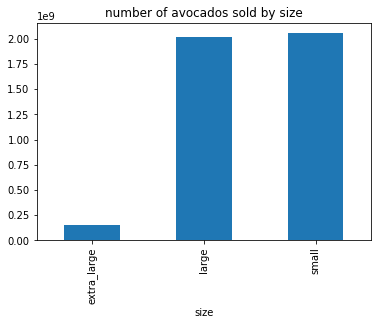

In [ ]:
# Create a bar plot of the number of avocados sold by size
nb_sold_by_size.plot(kind='bar', title= "number of avocados sold by size")

# Print the plot
plt.show()

## Changes in sales over time
Line plots are designed to visualize the `relationship between two numeric variables`, where each data values is connected to the next one. They are especially `useful for visualizing the change in a number over time` since `each time point is naturally connected to the next time point`. In this exercise, you'll visualize the change in avocado sales over three years.

1. Get the total number of avocados sold on each date. The DataFrame has two rows for each date -- one for `organic`, and one for `conventional`. Save this as `nb_sold_by_date`.

In [ ]:
nb_sold_by_date = avocados.groupby(['date','type'])['nb_sold'].sum()
nb_sold_by_date

date        type        
2015-01-04  conventional    26825337.71
            organic           454268.32
2015-01-11  conventional    24546158.57
            organic           535768.76
2015-01-18  conventional    24391389.04
                               ...     
2018-03-11  organic           539335.09
2018-03-18  conventional    25413822.05
            organic           616796.92
2018-03-25  conventional    27015311.64
            organic           464931.28
Name: nb_sold, Length: 338, dtype: float64

In [ ]:
# Get the total number of avocados sold on each date
nb_sold_by_date = avocados.groupby('date')['nb_sold'].sum()
nb_sold_by_date.head()

date
2015-01-04    27279606.03
2015-01-11    25081927.33
2015-01-18    24961540.48
2015-01-25    24094678.66
2015-02-01    39838734.08
Name: nb_sold, dtype: float64

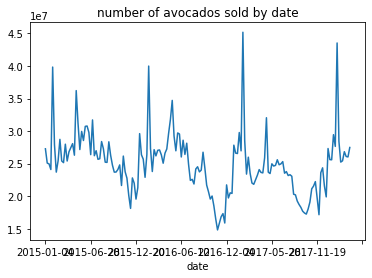

In [ ]:
# Create a line plot of the number of avocados sold by date
nb_sold_by_date.plot(kind="line", title="number of avocados sold by date")
plt.show()

## Avocado supply and demand
Scatter plots are ideal for visualizing `relationships between numerical variables`. In this exercise, you'll compare the number of avocados sold to average price and see if they're at all related. If they're related, you may be able to use one number to predict the other. 

1. Create a scatter plot with `nb_sold` on the x-axis and `avg_price` on the y-axis. Title it "Number of avocados sold vs. average price".

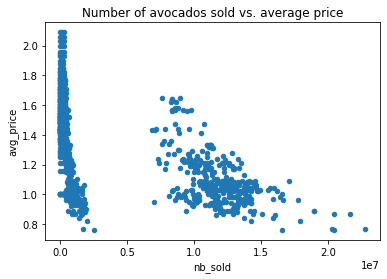

In [ ]:
# Scatter plot of nb_sold vs avg_price with title
avocados.plot(kind='scatter', x='nb_sold', y='avg_price', title='Number of avocados sold vs. average price')
plt.show()

## Price of conventional vs. organic avocados
Creating multiple plots for different subsets of data allows you to compare groups. In this exercise, you'll create multiple histograms to compare the prices of conventional and organic avocados.

1. 
* Subset avocados for the `conventional type`, and the `average price` column. Create a histogram.
*  Create a histogram of `avg_price` for organic type avocados.
* Add a legend to your plot, with the names "conventional" and "organic".
* Show your plot.

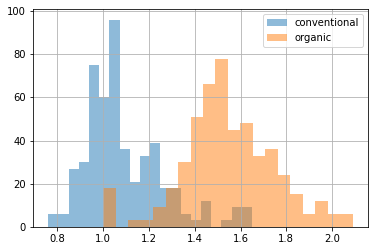

In [ ]:
# Histogram of conventional avg_price, modify histogram transparency to 0.5, bins=20
avocados[avocados["type"] == "conventional"]["avg_price"].hist(alpha=0.5, bins=20)

# # Histogram of organic avg_price, modify histogram transparency to 0.5, bins=20
avocados[avocados["type"] == "organic"]["avg_price"].hist(alpha=0.5, bins=20)

# Add a legend
plt.legend(["conventional", "organic"])

# Show the plot
plt.show()

## Missing values

### Finding missing values
Missing values are everywhere, and you don't want them interfering with your work. Some functions ignore missing data by default, but that's not always the behavior you might want. Some functions can't handle missing values at all, so these values need to be taken care of before you can use them. If you don't know where your missing values are, or if they exist, you could make mistakes in your analysis. In this exercise, you'll determine if there are missing values in the dataset, and if so, how many.

For this demonstration of handling with missing values, we will be using the subset that only contains sales from 2016. Let's create a subset from `avocados.`

In [ ]:
# Subset data that contains sales from 2016
avocados_2016 = avocados[avocados['year'] >= 2016]
avocados_2016.head()

,date,type,year,avg_price,size,nb_sold
52,2016-12-25,conventional,2016,1.00,small,9255125.20
53,2016-12-18,conventional,2016,0.96,small,9394065.91
54,2016-12-11,conventional,2016,0.98,small,9009996.11
55,2016-12-04,conventional,2016,1.00,small,11043350.90
56,2016-11-27,conventional,2016,1.21,small,7891487.94


In [ ]:
avocados_2016.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 702 entries, 52 to 1013
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       702 non-null    object 
 1   type       702 non-null    object 
 2   year       702 non-null    int64  
 3   avg_price  702 non-null    float64
 4   size       702 non-null    object 
 5   nb_sold    702 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 38.4+ KB


       date   type   year  avg_price   size  nb_sold
52    False  False  False      False  False    False
53    False  False  False      False  False    False
54    False  False  False      False  False    False
55    False  False  False      False  False    False
56    False  False  False      False  False    False
...     ...    ...    ...        ...    ...      ...
1009  False  False  False      False  False    False
1010  False  False  False      False  False    False
1011  False  False  False      False  False    False
1012  False  False  False      False  False    False
1013  False  False  False      False  False    False

[702 rows x 6 columns]
date         False
type         False
year         False
avg_price    False
size         False
nb_sold      False
dtype: bool


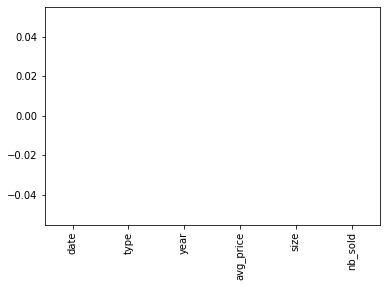

In [ ]:
# Import matplotlib.pyplot with alias plt
import matplotlib.pyplot as plt

# Check individual values for missing values
print(avocados_2016.isna())

# Check each column for missing values, shows whether any value in each column is missing or not.
print(avocados_2016.isna().any())

# Bar plot of missing values by variable
avocados_2016.isna().sum().plot(kind="bar")

# Show plot

### Removing missing values
Now that you know there are some missing values in your DataFrame, you have a few options to deal with them. One way is to remove them from the dataset completely. In this exercise, you'll remove missing values by removing all rows that contain missing values.

1. Remove the rows of `avocados_2016` that contain missing values and store the remaining rows in `avocados_complete`.
2. Verify that all missing values have been removed from `avocados_complete`. Calculate each column that has NAs and print.

In [ ]:
# Remove rows with missing values
avocados_complete = avocados_2016.dropna()

# Check if any columns contain missing values
print(avocados_complete.isna().any())

### Replacing missing values
Another way of handling missing values is to replace them all with the same value. For numerical variables, one option is to replace values with 0— you'll do this here. However, when you replace missing values, you make assumptions about what a missing value means. In this case, you will assume that a missing number sold means that no sales for that avocado type were made that week.

In this exercise, you'll see how replacing missing values can affect the distribution of a variable using histograms. You can plot histograms for multiple variables at a time as follows:
```
dogs[["height_cm", "weight_kg"]].hist()
```

1. A list has been created, cols_with_missing, containing the names of columns with missing values: `"small_sold"`, `"large_sold"`, and `"xl_sold"`. Create a histogram of those columns.
Show the plot.

In [ ]:
# List the columns with missing values
cols_with_missing = ["small_sold", "large_sold", "xl_sold"]

# Create histograms showing the distributions cols_with_missing
avocados_2016[cols_with_missing].hist()

# Show the plot
plt.show()

2. Replace the missing values of avocados_2016 with `0s` and store the result as a`vocados_filled`.
Create a histogram of the `cols_with_missing` columns of `avocados_filled`.

In [ ]:
# From previous step
cols_with_missing = ["small_sold", "large_sold", "xl_sold"]
avocados_2016[cols_with_missing].hist()
plt.show()

# Fill in missing values with 0
avocados_filled = avocados_2016.fillna(0)

# Create histograms of the filled columns
avocados_filled[cols_with_missing].hist()

# Show the plot
plt.show()

# Creating DataFrame

## Creating DF from list of dictionaries

You recently got some new avocado data from 2019 that you'd like to put in a DataFrame using the list of dictionaries method. Remember that with this method, you go through the data row by row.


In [ ]:
# Create a list of dictionaries with new data
avocados_list = [
    {'date': "2019-11-03", 'small_sold': 10376832, 'large_sold': 7835071},
    {'date': "2019-11-10", 'small_sold': 10717154, 'large_sold': 8561348},
]

# Convert list into DataFrame
avocados_2019 = pd.DataFrame(avocados_list)

# Print the new DataFrame
avocados_2019

,date,small_sold,large_sold
0,2019-11-03,10376832,7835071
1,2019-11-10,10717154,8561348


## Creating DF from dictionary of lists
Some more data just came in! This time, you'll use the dictionary of lists method, parsing the data column by column.

In [ ]:
# Create a dictionary of lists with new data
avocados_dict = {
  "date": ["2019-11-17", "2019-12-01"],
  "small_sold": [10859987, 9291631],
  "large_sold": [7674135, 6238096]
}

# Convert dictionary into DataFrame
avocados_2019 = pd.DataFrame(avocados_dict)

# Print the new DataFrame
print(avocados_2019)

         date  small_sold  large_sold
0  2019-11-17    10859987     7674135
1  2019-12-01     9291631     6238096


# Reading and writing CSVs

## CSV to DataFrame
You work for an airline, and your manager has asked you to do a competitive analysis and see how often passengers flying on other airlines are involuntarily bumped from their flights. You got a CSV file (airline_bumping.csv) from the Department of Transportation containing data on passengers that were involuntarily denied boarding in 2016 and 2017, but it doesn't have the exact numbers you want. In order to figure this out, you'll need to get the CSV into a pandas DataFrame and do some manipulation!

In [ ]:
# Read CSV as DataFrame called airline_bumping
airline_bumping = pd.read_csv('airline_bumping.csv')

# Take a look at the DataFrame
print(airline_bumping.head())

# Create new col, bumps_per_10k: no. of bumps per 10k passengers for each airline
airline_totals["bumps_per_10k"] = airline_totals['nb_bumped'] / airline_totals['total_passengers'] * 10000

# Print airline_totals
print(airline_totals)

## DataFrame to CSV
You're almost there! To make things easier to read, you'll need to sort the data and export it to CSV so that your colleagues can read it.

In [ ]:
# Create airline_totals_sorted
airline_totals_sorted = airline_totals.sort_values("bumps_per_10k", ascending=False)

# Print airline_totals_sorted
print(airline_totals_sorted)

# Save as airline_totals_sorted.csv
airline_totals_sorted.to_csv("airline_totals_sorted.csv")